In [115]:
import pandas as pd
import numpy as np
import math

import geopandas 
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import row, column
from bokeh.models import TapTool
from bokeh.models import ColumnDataSource

In [108]:
import geopandas as gpd

shapefile = 'gpr_000a11a_e.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['PRENAME', 'geometry']]
#Rename columns.
gdf.columns = ['Province', 'geometry']
#gdf.crs = {'init': 'epsg:4326'}
gdf

,Province,geometry
0,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0..."
1,Nunavut,"POLYGON ((-128.94260 89.99943, -128.54978 89.9..."
2,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ..."
3,Nova Scotia,"MULTIPOLYGON (((-59.68977 44.00006, -59.75763 ..."
4,Yukon,"POLYGON ((-140.49087 69.62751, -140.37462 69.6..."
5,New Brunswick,"POLYGON ((-66.26403 48.03711, -66.25884 48.036..."
6,Northwest Territories,"POLYGON ((-109.86175 70.00332, -109.86178 70.0..."
7,Manitoba,"POLYGON ((-96.76250 60.00001, -96.75000 60.000..."
8,British Columbia,"POLYGON ((-123.76250 60.00001, -123.75000 60.0..."
9,Prince Edward Island,"POLYGON ((-63.97414 46.81302, -63.97505 46.802..."


In [109]:
en_prov = pd.read_excel('Enrollement by Province 1026-2020.xlt')
en_prov['Province'].replace({'AB': 'Alberta', 'BC': 'British Columbia', 'MB': 'Manitoba', 'NB':'New Brunswick', 'NL': 'Newfoundland and Labrador', 'NS':'Nova Scotia', 'ON':'Ontario' , 'PE':'Prince Edward Island', 'SK':'Saskatchewan', 'QC':'Quebec' }, inplace=True)
en_prov

,Province,Year,En,Gr,ignore,Rate
0,Alberta,2016,2068,299,14.458414,14
1,Alberta,2017,1112,321,28.866906,29
2,Alberta,2018,1245,334,26.827309,27
3,Alberta,2019,1452,346,23.829201,24
4,Alberta,2020,1527,345,22.593320,23
5,British Columbia,2016,1551,253,16.312057,16
6,British Columbia,2017,1675,286,17.074627,17
7,British Columbia,2018,1575,307,19.492063,19
8,British Columbia,2019,2002,422,21.078921,21
9,British Columbia,2020,2144,459,21.408582,21


In [110]:
shape = pd.merge(left = gdf, right = en_prov, on = 'Province', how= 'left')

Shape= shape.dropna()
Shape

,Province,geometry,Year,En,Gr,ignore,Rate
0,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0...",2016.0,2068.0,299.0,14.458414,14.0
1,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0...",2017.0,1112.0,321.0,28.866906,29.0
2,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0...",2018.0,1245.0,334.0,26.827309,27.0
3,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0...",2019.0,1452.0,346.0,23.829201,24.0
4,Alberta,"POLYGON ((-114.11126 60.00007, -114.10000 60.0...",2020.0,1527.0,345.0,22.593320,23.0
6,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ...",2016.0,3265.0,698.0,21.378254,21.0
7,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ...",2017.0,2973.0,750.0,25.227043,25.0
8,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ...",2018.0,3456.0,836.0,24.189815,24.0
9,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ...",2019.0,3434.0,1225.0,35.672685,36.0
10,Quebec,"MULTIPOLYGON (((-61.68401 47.25846, -61.70941 ...",2020.0,3889.0,942.0,24.222165,24.0


In [111]:
def json_data(selectedYear):
    yr = selectedYear
    
    # Pull selected year from neighborhood summary data
    df_yr = en_prov[en_prov['Year'] == yr]
    
    # Merge the GeoDataframe object (sf) with the neighborhood summary data (neighborhood)
    merged = pd.merge(gdf, df_yr, on='Province', how='left')
    merged1= merged.dropna()
    
    # Bokeh uses geojson formatting, representing geographical features, with json
    # Convert to json
    merged_json = json.loads(merged1.to_json())
    
    # Convert to json preferred string-like object 
    json_data = json.dumps(merged_json)
    return json_data

In [114]:
# Input geojson source that contains features for plotting for:
# initial year 2016 and initial criteria enrollement
geosource = GeoJSONDataSource(geojson = json_data(2016))
input_field = 'Rate'

# Define a sequential multi-hue color palette.
palette = brewer['Blues'][8]

# Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

# Add hover tool
hover = HoverTool(tooltips = [ ('Province','@Province')])

# 
tap_tool = TapTool()


# Create a plotting function
def make_plot(field_name): 
  # Set the format of the colorbar
#   min_range = format_df.loc[format_df['field'] == field_name, 'min_range'].iloc[0]
#   max_range = format_df.loc[format_df['field'] == field_name, 'max_range'].iloc[0]
#   field_format = format_df.loc[format_df['field'] == field_name, 'format'].iloc[0]

  # Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 45)

  # Create color bar.
#   format_tick = NumeralTickFormatter(format=field_format)
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=18,
    border_line_color=None, location = (0, 0))

  # Create figure object.
#   verbage = format_df.loc[format_df['field'] == field_name, 'verbage'].iloc[0]

    p = figure(title = 'The percentage of Female students graduated in Canada', 
             height = 300, width = 600,
             toolbar_location = None)
  
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.axis.visible = False

  # Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource, fill_color = {'field' : input_field, 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
    
  # Specify color bar layout.
    p.add_layout(color_bar, 'right')

  # Add the hover tool to the graph
    p.add_tools(hover)
    p.add_tools(tap_tool)
    return p

def generate_bar_chart(selected_option):
    # Generate data for the bar chart based on the selected option
    dw = pd.read_excel('DW.xlt')
    dw_ = dw.loc[(dw['Province'] == selected_option) & (dw['Year'] == slider.value)]
#     source = ColumnDataSource(data=dict(categories=dw_['Institution'], values1=dw_['Enrolled'], values2=dw_['Graduated']))
    categories = list(dw_['Institution'])
    counts = list(dw_['Per_en'])
    counts_ = list(dw_['Per_gr'])
#     x="Institution", y=["Enrolled", "Graduated"]
    # Create the bar chart using Bokeh
    p = figure(x_range=categories, plot_height=500, title="Percentage of females enrolled and graduated per institution")
    p.vbar(x=categories, top=counts, width=0.4, color='orange', legend_label='Enrolled')
    p.vbar(x=categories, top=counts_, width=0.4, color='blue', legend_label='Graduated', 
       line_color='white', line_width=2)
#     p.vbar(x=categories, top=c, width=0.9)
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.axis_label = "Category"
    p.yaxis.axis_label = "Percentage"
    p.xaxis.major_label_orientation = "vertical"
    p.add_layout(p.legend[0], 'right')
    
    return p

# Define the callback function: update_plot
def update_plot(attr, old, new):
    # The input yr is the year selected from the slider
    yr = slider.value
    new_data = json_data(yr)
    
  
    # Update the plot based on the changed inputs
    p = make_plot(new_data)
    
    # Update the layout, clear the old document and display the new document
    layout = column(p,slider, dropdown_menu)
    curdoc().clear()
    curdoc().add_root(layout)
    
    # Update the data
    geosource.geojson = new_data
    
def update_layout(selected_option, val):
    yr = val
    new_data = json_data(yr)
    # Generate the choropleth map based on the selected option
    choropleth_map = make_plot(new_data)
    
    # Generate the bar chart based on the selected option
    bar_chart = generate_bar_chart(selected_option)
    
    
    
    # Create a layout with the choropleth map and the bar chart side by side
    layout_r = row(choropleth_map, bar_chart)
    layout_c = column(layout_r, slider, dropdown_menu)
    
    # Update the document layout
    curdoc().clear()
    curdoc().add_root(layout_c)
    


# Call the plotting function
p = make_plot(input_field)

# Make a slider object: slider 
slider = Slider(title = 'Year',start = 2016, end = 2020, step = 1, value = 2016)
slider.on_change('value', update_plot)

# Drop down
dropdown_menu = Select(title="Select a Province", options=["British Columbia", "Alberta", "Manitoba", "New Brunswick", "Newfoundland & Labrador", "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec"])
dropdown_menu.on_change("value", lambda attr, old, new: update_layout(new, slider.value))


# Make a column layout of widgetbox(slider) and plot, and add it to the current document
# Display the current document
layout = column(p, slider, dropdown_menu)
curdoc().add_root(layout)

In [117]:
import matplotlib.pyplot as plt
#on click plots
dw = pd.read_excel('DW.xlt')
dw

,Institution,Enrolled,Year,Graduated,Province,Total en,Total gr,Per_en,Per_gr
0,British Columbia Institute of Technology,42.0,2016,5,British Columbia,379.00,73.0,11.081794,6.849315
1,Carleton University,712.0,2016,102,Ontario,4281.00,568.0,16.631628,17.957746
2,Concordia University,767.0,2016,100,Quebec,3655.00,472.0,20.984952,21.186441
3,Conestoga College,7.0,2016,1,Ontario,195.00,30.0,3.589744,3.333333
4,Dalhousie University,369.0,2016,57,Nova Scotia,1719.00,346.0,21.465969,16.473988
...,...,...,...,...,...,...,...,...,...
205,University of Toronto,2122.0,2020,342,Ontario,5525.50,1075.0,38.403764,31.813953
206,University of Victoria,405.0,2020,64,British Columbia,1971.60,383.0,20.541692,16.710183
207,University of Waterloo,1953.0,2020,378,Ontario,6592.60,1364.0,29.624124,27.712610
208,University of Windsor,271.0,2020,60,Ontario,1526.31,325.0,17.755240,18.461538


<AxesSubplot:title={'center':'Province : Ontario'}, xlabel='Institution'>

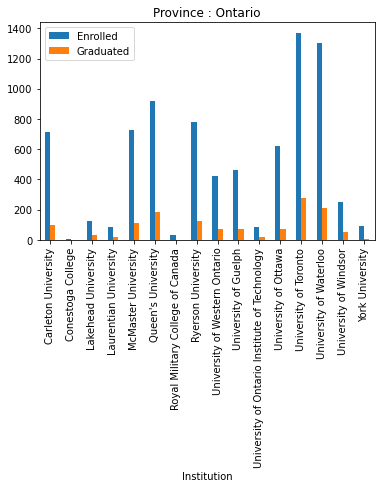

In [113]:
#Institutions of each province
dw_AB_2016 = dw.loc[(dw['Province'] == 'Alberta') & (dw['Year'] == 2016)]
dw_AB_2017 = dw.loc[(dw['Province'] == 'Alberta') & (dw['Year'] == 2017)]
dw_AB_2018 = dw.loc[(dw['Province'] == 'Alberta') & (dw['Year'] == 2018)]
dw_AB_2019 = dw.loc[(dw['Province'] == 'Alberta') & (dw['Year'] == 2019)]
dw_AB_2020 = dw.loc[(dw['Province'] == 'Alberta') & (dw['Year'] == 2020)]
dw_BC_2016 = dw.loc[(dw['Province'] == 'British Columbia') & (dw['Year'] == 2016)]
dw_BC_2017 = dw.loc[(dw['Province'] == 'British Columbia') & (dw['Year'] == 2017)]
dw_BC_2018 = dw.loc[(dw['Province'] == 'British Columbia') & (dw['Year'] == 2018)]
dw_BC_2019 = dw.loc[(dw['Province'] == 'British Columbia') & (dw['Year'] == 2019)]
dw_BC_2020 = dw.loc[(dw['Province'] == 'British Columbia') & (dw['Year'] == 2020)]
dw_MB_2016 = dw.loc[(dw['Province'] == 'Manitoba') & (dw['Year'] == 2016)]
dw_MB_2017 = dw.loc[(dw['Province'] == 'Manitoba') & (dw['Year'] == 2017)]
dw_MB_2018 = dw.loc[(dw['Province'] == 'Manitoba') & (dw['Year'] == 2018)]
dw_MB_2019 = dw.loc[(dw['Province'] == 'Manitoba') & (dw['Year'] == 2019)]
dw_MB_2020 = dw.loc[(dw['Province'] == 'Manitoba') & (dw['Year'] == 2020)]
dw_ON_2016 = dw.loc[(dw['Province'] == 'Ontario') & (dw['Year'] == 2016)]
dw_ON_2017 = dw.loc[(dw['Province'] == 'Ontario') & (dw['Year'] == 2017)]
dw_ON_2018 = dw.loc[(dw['Province'] == 'Ontario') & (dw['Year'] == 2018)]
dw_ON_2019 = dw.loc[(dw['Province'] == 'Ontario') & (dw['Year'] == 2019)]
dw_ON_2020 = dw.loc[(dw['Province'] == 'Ontario') & (dw['Year'] == 2020)]



dw_ON_2016.plot(x="Institution", y=["Enrolled", "Graduated"], kind="bar", title = "Province : Ontario")